### 결정 트리

- 분류/회귀에 사용
- 특성으로 결정.... 루트~리프 노드까지

- 순수 노드까지 진행하면 과대적합이 됨.
- 과대적합 방지를 위해 가지치기, 깊이 제한 등..


- 특성 하나하나를 봄
- 이진 특성 + 연속적 특성 혼합된 것 가능

>- max_depth, max_leaf_nodes, min_samples_leaf, min_samples_split

### DecisionTreeClassifier

criterion = 'gini' ...

>- 가지 분할 수행 기준
>- 이질성이 작아지는 방향으로 가지 분할을 수행
>- 카이제곱 통계량의 p값, 지니지수, 엔트로피 지수 사용함

>- 회귀 가지분할 기준
>- F 통계량의 F값 = 분산의 감소량 사용
>- F가 커지는 방향으로 가지 분할

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import mglearn
from sklearn.model_selection import train_test_split

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/NanumBarunGothic.ttf').get_name()
rc('font',family=font_name)

matplotlib.rcParams['axes.unicode_minus'] = False  

(100, 2)


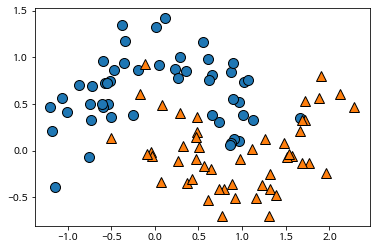

In [38]:
from sklearn.datasets import make_moons

#make moon으로 데이터셋 생성/ 샘플 100개
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
print(X.shape)

mglearn.discrete_scatter(X[:,0], X[:,1], y)

score =  0.86


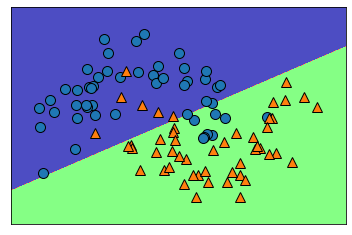

In [3]:
from sklearn.linear_model import LogisticRegression

lgr = LogisticRegression().fit(X,y)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
mglearn.plots.plot_2d_classification(lgr, X, alpha=.7, fill=True)

print("score = ", lgr.score(X,y))

#로지스틱회귀로 분류한 결과

### LogisticRegression - moon data

score =  0.96


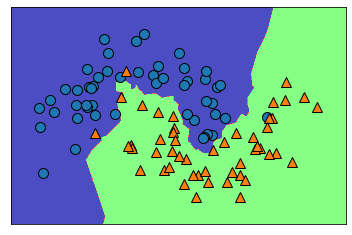

In [4]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3).fit(X,y)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
mglearn.plots.plot_2d_classification(knn, X, alpha=.7, fill=True)

print("score = ", knn.score(X,y))

#knn 이웃수 = 3으로 분류한 결과
#연산 엄청 느림!!

### KneighborsClassifier - moon data

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.840


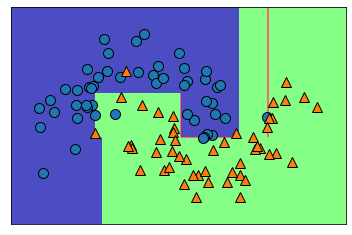

In [5]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

tree = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
#결정트리 모델 생성
#결정트리에는 random state를 설정??

print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

mglearn.discrete_scatter(X[:,0], X[:,1], y)
mglearn.plots.plot_2d_classification(tree, X, alpha=.7, fill=True)
#그래프 상으로 표현

### DecisionTreeClassifier - moon data

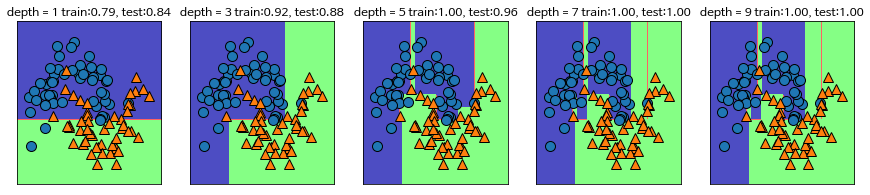

In [6]:
from sklearn.tree import DecisionTreeClassifier
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

fig, axes = plt.subplots(1,5,figsize=(15,3))

#최대 깊이를 정해서 과적합을 방지함

for d, ax in zip([1,3,5,7,9], axes):
    tree = DecisionTreeClassifier(max_depth=d, random_state=0).fit(X, y)
    ax.set_title("depth = {} train:{:.2f}, test:{:.2f}".format(d, tree.score(X_train,y_train), tree.score(X_test,y_test)))
    mglearn.discrete_scatter(X[:,0], X[:,1], y,ax=ax)
    mglearn.plots.plot_2d_classification(tree, X, alpha=.7, fill=True,ax=ax)
  

### max depth 설정

- 커질수록 훈련, 테스트에 대해서 정확도가 올라감
- 깊이 7부터는 둘 다 1.0
- 더 깊이 갈수록 정확도 상승


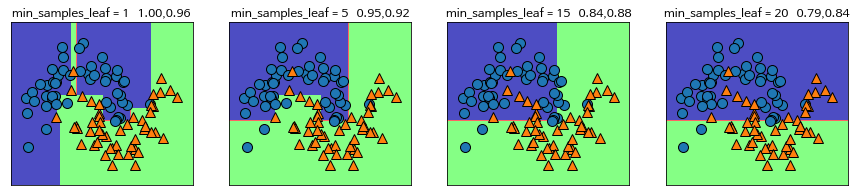

In [7]:

fig, axes = plt.subplots(1,4,figsize=(15,3))

for d, ax in zip([1,5,15,20], axes):
    tree = DecisionTreeClassifier(max_depth=5, random_state=0, min_samples_leaf=d).fit(X, y)
    ax.set_title("min_samples_leaf = {}   {:.2f},{:.2f}".format(d, tree.score(X_train,y_train), tree.score(X_test,y_test)))
    mglearn.discrete_scatter(X[:,0], X[:,1], y,ax=ax)
    mglearn.plots.plot_2d_classification(tree, X, alpha=.7, fill=True,ax=ax)
  

### min samples leaf를 설정

- 위의 파라미터는 리프 노드가 되기 위한 최소 샘플 개수..
- 즉 리프 노드가 되려면 거기에 속한 샘플이 n개 이상이어야 함.


- 값이 증가할수록 점수가 떨어짐.
- 더 깊이 가지 못하고 가지치기 돼서 약간의 차이가 생기는 것임.

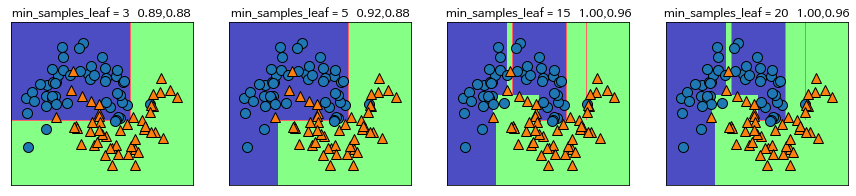

In [8]:

fig, axes = plt.subplots(1,4,figsize=(15,3))

for d, ax in zip([3,5,15,20], axes):
    tree = DecisionTreeClassifier(max_depth=5, random_state=0, max_leaf_nodes=d).fit(X, y)
    ax.set_title("min_samples_leaf = {}   {:.2f},{:.2f}".format(d, tree.score(X_train,y_train), tree.score(X_test,y_test)))
    mglearn.discrete_scatter(X[:,0], X[:,1], y,ax=ax)
    mglearn.plots.plot_2d_classification(tree, X, alpha=.7, fill=True,ax=ax)
  

### max leaf nodes 설정

- 리프 노드의 최대 개수를 설정함


- 클수록 많은 리프노드를 찾고 작을수록 가지치기 되는 부분이 많아짐
- 위도 커질수록 성능이 좋아지는 것을 확인 가능함

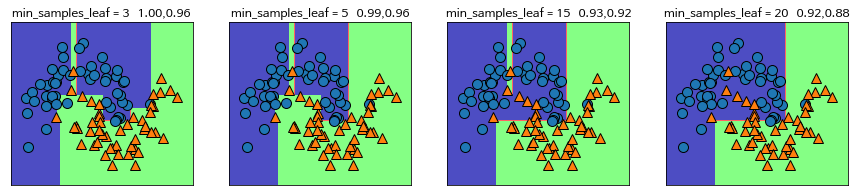

In [9]:

fig, axes = plt.subplots(1,4,figsize=(15,3))

for d, ax in zip([3,5,15,20], axes):
    tree = DecisionTreeClassifier(max_depth=5, random_state=0, min_samples_split=d).fit(X, y)
    ax.set_title("min_samples_leaf = {}   {:.2f},{:.2f}".format(d, tree.score(X_train,y_train), tree.score(X_test,y_test)))
    mglearn.discrete_scatter(X[:,0], X[:,1], y,ax=ax)
    mglearn.plots.plot_2d_classification(tree, X, alpha=.7, fill=True,ax=ax)
  

### min_samples_split 설정

- 노드가 분할하기 위한 최소 샘플 개수


- 작을수록 더 많은 분할이 가능함
- 일정 샘플 이상 되어야 분할을 하니까 클수록 더 깊게 가지 못함

In [103]:
from sklearn.model_selection import cross_val_predict


X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42, stratify=y)

dtree = DecisionTreeClassifier(random_state=1).fit(X_train,y_train)
print("random state = 1")
print("테스트 세트 정확도: {:.3f}".format(dtree.score(X_test, y_test)))
print(dtree.feature_importances_)
cvs = cross_val_score(dtree, X, y,cv=5)
cvp = cross_val_predict(dtree, X, y, cv=5)
print("테스트 세트 정확도: CV = 5 {:.3f}".format(cvs.mean()))
print(cvp)

cvp = cross_val_predict(dtree, X, y, cv=10)
cvs = cross_val_score(dtree, X, y,cv=10)
print("테스트 세트 정확도: CV = 10 {:.3f}".format(cvs.mean()))
print(cvp)
why = cvp

random state = 1
테스트 세트 정확도: 0.880
[0.43726673 0.56273327]
테스트 세트 정확도: CV = 5 0.850
[1 1 0 1 1 1 1 0 0 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1
 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1
 1 0 1 1 1 0 1 0 1 1 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1 0]
테스트 세트 정확도: CV = 10 0.860
[1 1 0 1 1 1 1 0 0 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1
 1 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1
 1 0 1 1 1 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 1 1 1 0]


In [104]:
dtree = DecisionTreeClassifier(random_state=42).fit(X_train,y_train)

print("random state = 2")
print("테스트 세트 정확도: {:.3f}".format(dtree.score(X_test, y_test)))
print(dtree.feature_importances_)

cvs = cross_val_score(dtree, X, y,cv=5)
cvp = cross_val_predict(dtree, X, y, cv=5)
print("테스트 세트 정확도: CV = 5 {:.3f}".format(cvs.mean()))
print(cvp)
cvp = cross_val_predict(dtree, X, y, cv=10)
cvs = cross_val_score(dtree, X, y,cv=10)
print("테스트 세트 정확도: CV = 10 {:.3f}".format(cvs.mean()))
print(cvp)
print(np.where(cvp!=why))

random state = 2
테스트 세트 정확도: 0.880
[0.43726673 0.56273327]
테스트 세트 정확도: CV = 5 0.850
[1 1 0 1 1 1 1 0 0 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1
 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1
 1 0 0 1 1 0 1 0 1 1 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1 0]
테스트 세트 정확도: CV = 10 0.840
[1 1 0 1 1 1 1 0 0 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1
 1 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1
 1 0 1 1 1 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 1 1 1 1]
(array([67, 99], dtype=int64),)


##### 게시판 질문...

random state... 
>- 난수는 결정 트리에서는 feature의 split 랜덤성의 제어... 
>- 위의 feature importances를 보면 random state와 상관없이 동일함.. > feature가 2개밖에 없기 때문에 split 영향이 없으니까..

cross val predict로 예측값을 가져왔는데 저 67, 99번째 예측 값이 다름..
>- cross 적용하면서 데이터가 분할되고 나뉘어진 세트에 따라 테스트/훈련 으로 돌아가면서 쓰는건데.. 정확히 어디에 영향이 가는걸까


추가!!

>- 다른 분들 의견도 cross val의 영향이라고 답변..
>- 아마 저 random state가 cross val에서 데이터를 나누고 적용시킬때도 사용되기 때문에 조금 다른 결과가 나오는 것으로 예상함

In [10]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                   random_state=42, stratify=cancer.target)

for depth in [1, 4, 8]:
    tree = DecisionTreeClassifier(max_depth=depth, random_state=0)
    tree.fit(X_train, y_train)
    print("max_depth = ", depth)
    print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
    print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))


max_depth =  1
훈련 세트 정확도: 0.923
테스트 세트 정확도: 0.923
max_depth =  4
훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.951
max_depth =  8
훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.937


### Cancer Data

- cancer data에 대해서 결정트리로 정확도 측정!
- 테스트 데이터에서는 depth 4에서 가장 성능이 좋음

In [11]:
from sklearn.tree import export_graphviz

#print(cancer.target_names)
#print(cancer.feature_names)

# dot파일로 생성된 tree모델에 대해서 내보냄.
export_graphviz(tree, out_file='tree.dot', class_names=["악성", "양성"],
               feature_names=cancer.feature_names, impurity = False, filled=True)

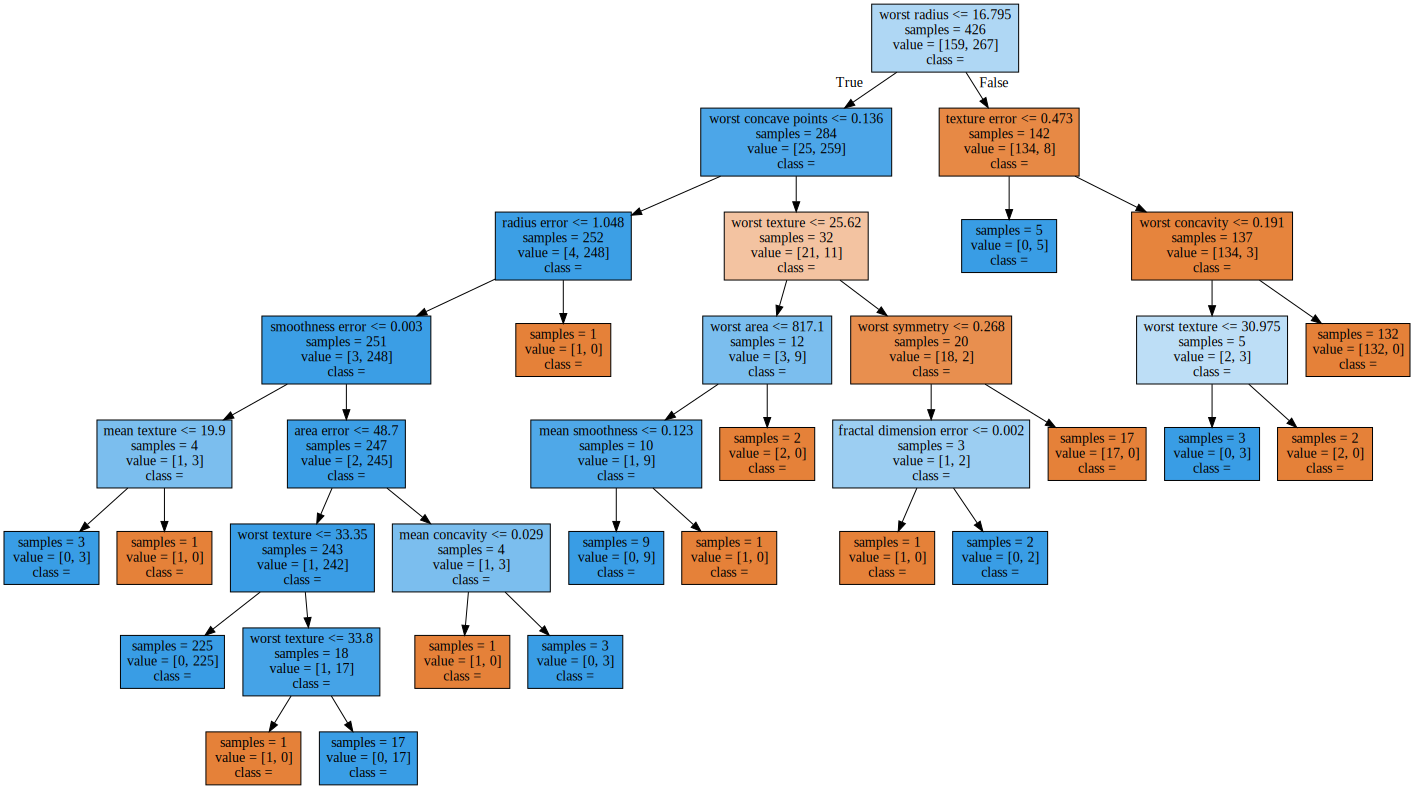

'cancer_tree.pdf'

In [12]:
import graphviz
## 에러는 exe파일 설치와 conda install graphviz로 해결

# 파일 열기
with open("tree.dot", encoding='utf-8') as f:
     dot_graph = f.read()

#graphviz로 display
dot=graphviz.Source(dot_graph)

display(dot) # 가져온 dot 파일 트리 형태로 보여주기
dot.render("cancer_tree") #pdf형태로 저장

### digraph Tree 
node [shape=box, style="filled", color="black"] ;

node들 설정. 박스 형태의 색이 채워지고 글자색은 검정색


>-0 [label="worst radius <= 16.795\nsamples = 426\nvalue = [159, 267]\nclass = 양성", fillcolor="#afd7f4"] ;
>- label로 박스 안에 들어가는 텍스트를 넣고 fillcolor로 색 설정

>- 0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
>- 다음과 같이 노드와 노드를 연결해줌. 거리와 각도 설정

In [13]:
# 유방암 데이터에 대해.. 모델을 주면 그에 따른 특성 중요도를 보여주는 함수

def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names) # y축
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(0, n_features)
    plt.xlim(0,1)
    plt.grid()

특성 중요도
 [0.         0.00752597 0.         0.         0.00903116 0.
 0.00752597 0.         0.         0.         0.00975731 0.04630969
 0.         0.00238745 0.00231135 0.         0.         0.
 0.         0.00668975 0.69546322 0.05383211 0.         0.01354675
 0.         0.         0.01740312 0.11684357 0.01137258 0.        ]
가장 중요도가 높은 특성 = ['worst radius']


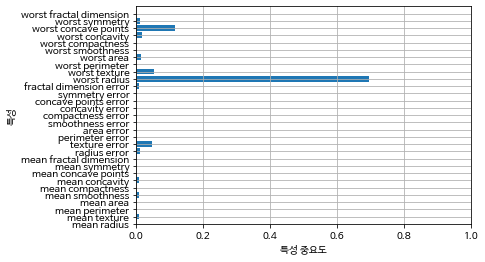

In [14]:
print("특성 중요도\n", tree.feature_importances_) #분류기에만 있는 중요도!

plot_feature_importances_cancer(tree)

most = np.where(tree.feature_importances_.max() == tree.feature_importances_)
print('가장 중요도가 높은 특성 =', cancer.feature_names[most])

### cancer - decisiontree 중요도

cancer의 경우는 특성이 30가지.

- 중요도는 양수
- 중요도가 낮다고 유용하지 않은 정보가 아님
- 0-1 사이의 값
- 클수록 클래스를 잘 나뉘게 할 수 있음

- 위의 dot문서와 비교하면 루트 노드가 worst radius.
- 중요도가 가장 높은 특성도 worst radius로 중요도 따라서 진행함을 알 수 있음
- 그 다음은 worst concave ..


- ig가 높아지는 방향으로 특성을 고르기 때문..
- IG = Information Gain = 원래 값 - 분기한 후 값

Feature importances: [0. 1.]


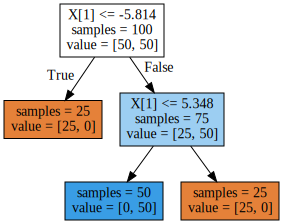

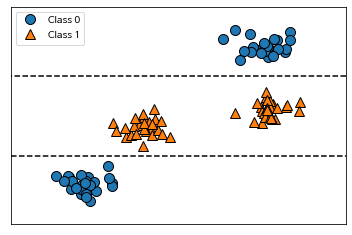

In [15]:
mono = mglearn.plots.plot_tree_not_monotone()
display(mono)

# X, y = make_blobs(centers=4, random_state=8)
# y= y%2
# tree = DecisionTreeClassifier(random_state=0).fit(X,y)

- 위를 보면 루트로 맨 아래 클래스 0을 나누고
- 하늘색 박스로 맨 위의 클래스 0을 나눈다

ram_prices.shape:  (333, 3)
ram_prices.keys():  Index(['Unnamed: 0', 'date', 'price'], dtype='object')
   Unnamed: 0    date        price
0           0  1957.0  411041792.0
1           1  1959.0   67947725.0
2           2  1960.0    5242880.0
3           3  1965.0    2642412.0
4           4  1970.0     734003.0


Text(0, 0.5, '가격 ($/Mbyte)')

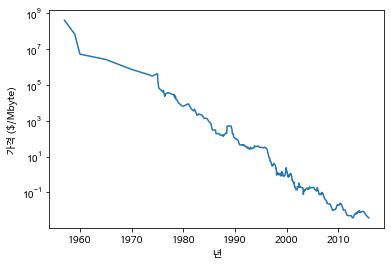

In [16]:
import os
ram_prices= pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv")) 

print("ram_prices.shape: ", ram_prices.shape)
print("ram_prices.keys(): ", ram_prices.keys())
print(ram_prices[:5])

plt.yticks(fontname='Arial') #설정 안해주면 -심볼 관련 오류남
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("년")
plt.ylabel("가격 ($/Mbyte)")

#semilogy > y축을 로그 스케일로 변환하여 표현
#semilogx, loglog(x, y 모두 로그 스케일)
#차이가 심한 값들의 보정을 위해 로그로 표현함

In [19]:
# 2000년도를 기준으로 훈련과 테스트 데이터를 나눔
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

print("train.shape : {}, test.shape : {}".format(data_train.shape, data_test.shape))

#날짜만 추출
X_train = np.array(data_train.date).reshape(-1,1)
#np.array(data_train.date).reshape(-1,1)

#로그 스케일로 변환함
y_train = np.log(data_train.price)
#print(np.log(data_train.price))

print("X_train.shape : {}, y_train.shape : {}".format(X_train.shape, y_train.shape))

#전체에 대한 date값
X_all = np.array(ram_prices.date).reshape(-1,1)

# [:, np.newaxis] ->  미래 버전에서 삭제될 예정...

train.shape : (202, 3), test.shape : (131, 3)
X_train.shape : (202, 1), y_train.shape : (202,)


#### 결정 트리 회귀!

- DecisionTreeRegressor
- 훈련 데이터 범위 밖을 예측하는 외삽 extrapolation 불가능

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor


#결정트리와 선형 모델 생성
tree = DecisionTreeRegressor(random_state=0).fit(X_train, y_train)
lr = LinearRegression().fit(X_train, y_train)

#데이터 예측하기 - 전체 기간에 대해서
pred_tree = tree.predict(X_all)
pred_lr = lr.predict(X_all)

#로그화 풀어주기.. exponential
pred_tree = np.exp(pred_tree)
pred_lr = np.exp(pred_lr)



Text(0, 0.5, '가격 ($/Mbyte)')

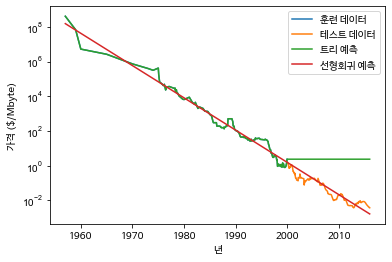

In [21]:
plt.yticks(fontname='Arial') #설정 안해주면 -심볼 관련 오류남
plt.semilogy(data_train.date, data_train.price, label='훈련 데이터')
plt.semilogy(data_test.date, data_test.price, label='테스트 데이터')
plt.semilogy(ram_prices.date, pred_tree, label='트리 예측')
plt.semilogy(ram_prices.date, pred_lr, label='선형회귀 예측')
plt.legend()
plt.xlabel("년")
plt.ylabel("가격 ($/Mbyte)")


그래프와 같이 결정 트리는 훈련 데이터에 없는 범위 외삽에 대해서 예측을 하지 못한다.

훈련 데이터가 없는 2000이후를 보면 트리 예측이 안되는 것을 알 수 있다

In [22]:
from sklearn.datasets import load_boston
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


boston = load_boston()

X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0) 

decreg = DecisionTreeRegressor().fit(X_train, y_train) #결정트리회귀
lr = LinearRegression().fit(X_train, y_train) #선형회귀
knn = KNeighborsRegressor(n_neighbors=5).fit(X_train, y_train) # k이웃회귀
ridge = Ridge(alpha=0.01).fit(X_train, y_train)
lasso = Lasso(alpha=0.01).fit(X_train, y_train)

print("Train")
print("decisionTree : {:.3f}".format(decreg.score(X_train,y_train)))
print("linear : {:.3f}".format(lr.score(X_train,y_train)))
print("knn : {:.3f}".format(lasso.score(X_train,y_train)))
print("ridge : {:.3f}".format(ridge.score(X_train,y_train)))
print("Lasso : {:.3f}".format(lasso.score(X_train,y_train)))


print("\nTEST")
print("decisionTree : {:.3f}".format(decreg.score(X_test,y_test)))
print("linear : {:.3f}".format(lr.score(X_test,y_test)))
print("knn : {:.3f}".format(lasso.score(X_test,y_test)))
print("ridge : {:.3f}".format(ridge.score(X_test,y_test)))
print("Lasso : {:.3f}".format(lasso.score(X_test,y_test)))



Train
decisionTree : 1.000
linear : 0.770
knn : 0.769
ridge : 0.770
Lasso : 0.769

TEST
decisionTree : 0.645
linear : 0.635
knn : 0.632
ridge : 0.635
Lasso : 0.632


회귀들 모아서 테스트함

> 훈련 데이터
>- 결정트리는 과대적합 됐음 >> 결정트리의 특징..
>- 다른 모델은 비슷한 결과

> 테스트 데이터
>- 다 비슷한 결과!

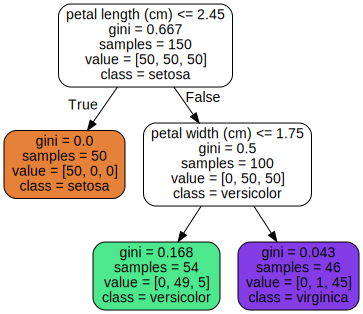

In [23]:
## IRIS

from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data # 특성 2~3번 꽃잎 길이와 너비
y = iris.target

tree = DecisionTreeClassifier(max_depth=2,
                                 random_state=42).fit(X,y)

export_graphviz(tree, out_file='iris_tree.dot', class_names=iris.target_names,
               feature_names=iris.feature_names, rounded=True, filled=True)

graphviz.Source.from_file('iris_tree.dot')

#from_file => 가져와서 display까지 

# with open("iris_tree.dot", encoding='utf-8') as f:
#     dot_graph = f.read()
# display(graphviz.Source(dot_graph))

#rounded > 각 노드의 테투리를 둥글게


### Iris - DecisionTree

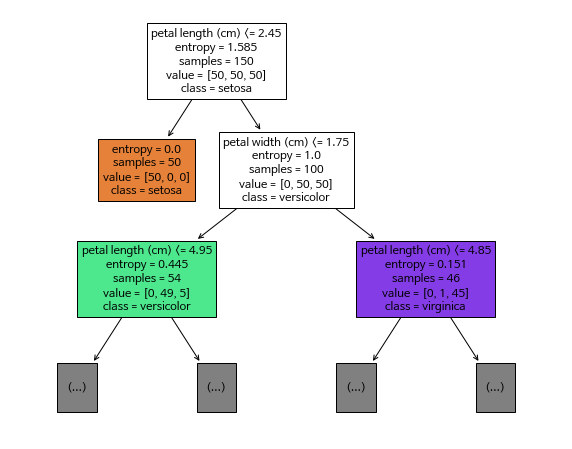

In [25]:
from sklearn.tree import plot_tree

tree = DecisionTreeClassifier(criterion = 'entropy',
                                 random_state=42).fit(X,y)

plt.figure(figsize=(10,8))
plot_tree(tree, filled=True, max_depth=2, feature_names=iris.feature_names, class_names = iris.target_names)
plt.show()

 #### plot_tree
 
 graphviz는 모델의 depth설정 기반인데 비해서 plot tree는 plot tree 안에서 한다
 
 깊이 설정이 가능하다. >> 더 유연함
 
 보면 graphviz와 다르게 더 분할 가능하다면 가능한 것을 알려주는 회색 노드들이 있다


#### criterion

gini vs entropy

- 거의 유사한 결과
- 지니지수 = 1 - ∑pi**2
- 엔트로피 = - ∑pi*log(pi)

손실함수로 따진 후 최소가 되는 방향으로 분할함


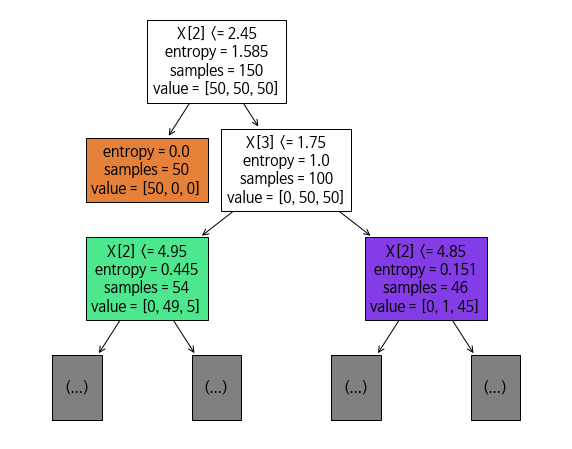

In [26]:



plt.figure(figsize=(10,8))
plot_tree(tree, filled=True, max_depth=2)
plt.show()


#여긴 figure로 크기 지정 안해주면 잘못하면 모여서 찌그러진 형태로 나온다..

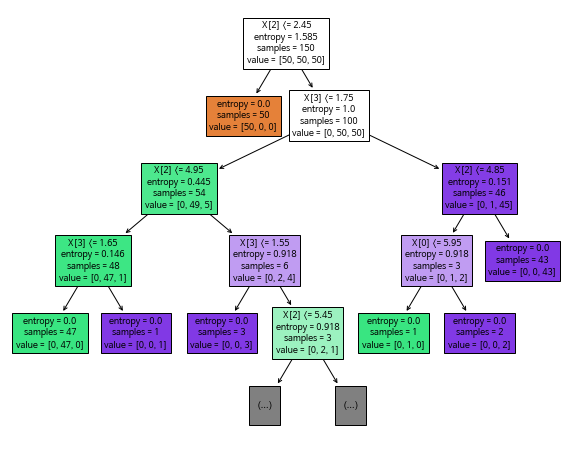

In [27]:
plt.figure(figsize=(10,8))
plot_tree(tree, filled=True, max_depth=4)
plt.show()

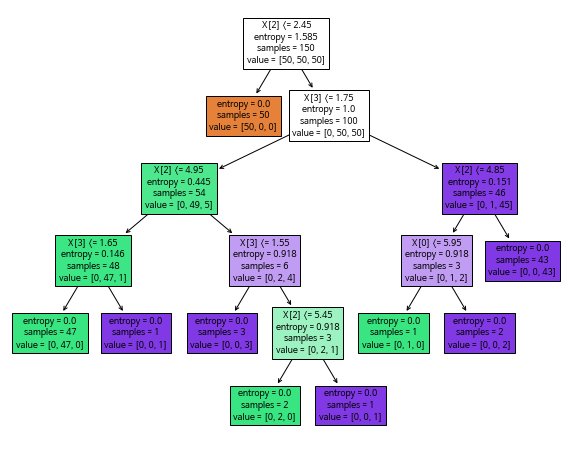

In [28]:
plt.figure(figsize=(10,8))
plot_tree(tree, filled=True, max_depth=5)
plt.show()

max_depth

- 2, 4, 5를 비교하면 위와 같다

- 5까지 하니까 리프 노드들이 전부 순수 리프노드가 됐음을 확인할 수 있다

In [29]:
# iris 데이터에 대해.. 모델을 주면 그에 따른 특성 중요도를 보여주는 함수


def plot_feature_importances_iris(model):
    n_features = iris.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), iris.feature_names) # y축
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(0, n_features)
    plt.xlim(0,1)
    plt.grid()



[0.         0.01333333 0.06405596 0.92261071]


Text(0.5, 1.0, 'Gini')

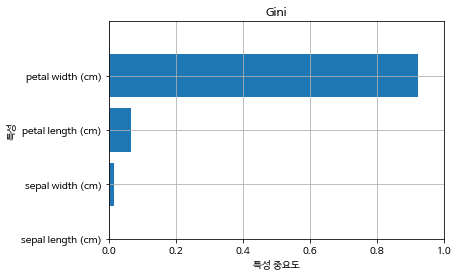

In [36]:
tree = DecisionTreeClassifier(criterion='gini',random_state=0)
tree.fit(iris.data, iris.target)

print(tree.feature_importances_)

plot_feature_importances_iris(tree)
plt.title('Gini')

[0.01333333 0.         0.56405596 0.42261071]


Text(0.5, 1.0, 'Gini')

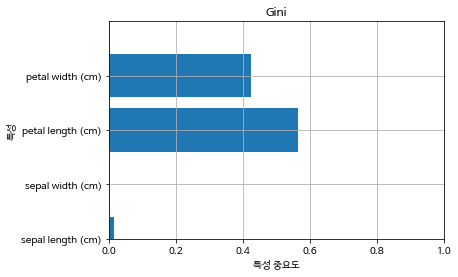

In [37]:
tree = DecisionTreeClassifier(criterion='gini',random_state=42)
tree.fit(iris.data, iris.target)

print(tree.feature_importances_)

plot_feature_importances_iris(tree)
plt.title('Gini')

중요도가 random state값에 크게 영향을 받는다.. 

- 공식문서 -  https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

[0.0115876  0.         0.65703358 0.33137881]


Text(0.5, 1.0, 'Entropy')

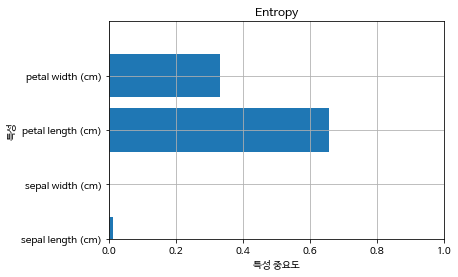

In [31]:
tree = DecisionTreeClassifier(criterion='entropy',random_state=42)
tree.fit(iris.data, iris.target)

print(tree.feature_importances_)

plot_feature_importances_iris(tree)
plt.title("Entropy")

iris의 특성 중요도!

- 중요도 순서는 같으나 실제 값이 조금 다른 것을 확인할 수 있다.

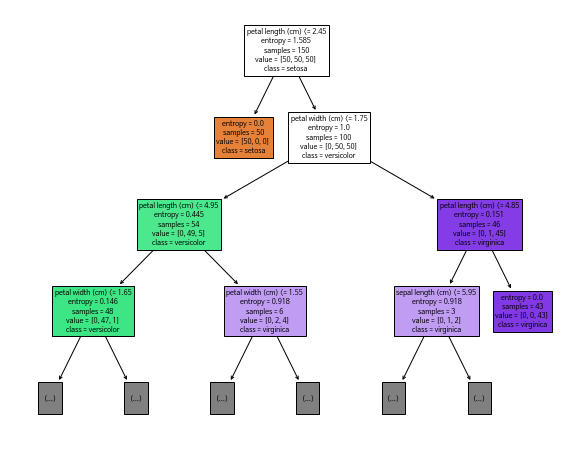

In [32]:
plt.figure(figsize=(10,8))
plot_tree(tree, filled=True, max_depth=3, feature_names=iris.feature_names, class_names = iris.target_names)
plt.show()

- 특성 중요도가 높은 순서대로 루트부터 사용되는 것을 확인할 수 있다.